<a href="https://colab.research.google.com/github/Auzek2002/Spam_SMS_Detection_ML/blob/main/Spam_SMS_Detection_System_Codsoft_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

**Loading the Dataset**

In [ ]:
sms_raw_data = pd.read_csv("/content/spam.csv",encoding='latin-1')

**Data Analysis**

In [ ]:
sms_raw_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms_raw_data.shape

(5572, 5)

In [ ]:
sms_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
print(f"The number of rows is: {sms_raw_data.shape[0]}")
print(f"The number of columns is: {sms_raw_data.shape[1]}")

The number of rows is: 5572
The number of columns is: 5


checking if there are any null values or not

In [ ]:
sms_raw_data.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


checking the sum of null values:

In [ ]:
sms_raw_data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

Dropping unwanted columns

In [ ]:
sms_raw_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
sms_raw_data = sms_raw_data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1)

In [ ]:
sms_raw_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms_raw_data.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


**Label Encoding (1 -> ham and 0 -> spam)**

In [ ]:
sms_raw_data.loc[sms_raw_data['v1'] == 'ham','v1'] = 1
sms_raw_data.loc[sms_raw_data['v1'] == 'spam','v1'] = 0

In [ ]:
sms_raw_data.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms_raw_data.tail()

,v1,v2
5567,0,This is the 2nd time we have tried 2 contact u...
5568,1,Will Ì_ b going to esplanade fr home?
5569,1,"Pity, * was in mood for that. So...any other s..."
5570,1,The guy did some bitching but I acted like i'd...
5571,1,Rofl. Its true to its name


**Visualizing The Target Data (For Imbalance)**

In [ ]:
sms_raw_data['v1'].value_counts()

1    4825
0     747
Name: v1, dtype: int64

<Axes: xlabel='v1', ylabel='count'>

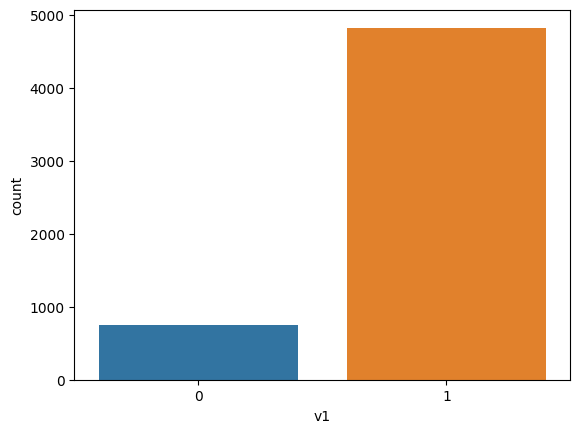

In [ ]:
sns.countplot(x=sms_raw_data['v1'], data = sms_raw_data)    #1 for ham and 0 for spam

**Creating Target variable and Input features**

In [ ]:
x = sms_raw_data['v2']
y = sms_raw_data['v1']

In [ ]:
x.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: v2, dtype: object

In [ ]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: v1, dtype: object

**Feature Extraction**

In [ ]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase= True)
x_features = feature_extraction.fit_transform(x)
y = y.astype('int')

In [ ]:
print(x_features)

  (0, 8026)	0.19609779550499865
  (0, 1051)	0.3509649021061901
  (0, 3494)	0.16470488207184114
  (0, 1994)	0.2964965675440533
  (0, 1701)	0.33503393550839805
  (0, 4349)	0.2964965675440533
  (0, 8227)	0.23740046706740073
  (0, 3534)	0.19387320529717864
  (0, 1703)	0.2964965675440533
  (0, 1271)	0.2625103008882829
  (0, 2271)	0.27179815735762314
  (0, 5741)	0.2745089285415426
  (0, 4224)	0.3509649021061901
  (1, 5369)	0.5465881710238072
  (1, 8134)	0.4316010362639011
  (1, 4192)	0.5236458071582338
  (1, 4385)	0.4082988561907181
  (1, 5343)	0.27211951321382544
  (2, 77)	0.23759715224911548
  (2, 1128)	0.1707825659976717
  (2, 6062)	0.1707825659976717
  (2, 7701)	0.12576907263059747
  (2, 7028)	0.1989696587085652
  (2, 6010)	0.1808417865094903
  (2, 6115)	0.16914304332607796
  :	:
  (5567, 5118)	0.2445888397614688
  (5567, 8202)	0.19074118816829963
  (5567, 2000)	0.185955090206136
  (5567, 5894)	0.19532744699307247
  (5567, 6062)	0.23098372602432177
  (5568, 2907)	0.6005703500933404
  (55

**Over Sampling (To balance data)**

In [ ]:
x_sampled, y_sampled = SMOTE().fit_resample(x_features,y)

In [ ]:
y_sampled.value_counts()

1    4825
0    4825
Name: v1, dtype: int64

In [ ]:
print(x_sampled)

  (0, 8026)	0.19609779550499865
  (0, 1051)	0.3509649021061901
  (0, 3494)	0.16470488207184114
  (0, 1994)	0.2964965675440533
  (0, 1701)	0.33503393550839805
  (0, 4349)	0.2964965675440533
  (0, 8227)	0.23740046706740073
  (0, 3534)	0.19387320529717864
  (0, 1703)	0.2964965675440533
  (0, 1271)	0.2625103008882829
  (0, 2271)	0.27179815735762314
  (0, 5741)	0.2745089285415426
  (0, 4224)	0.3509649021061901
  (1, 5369)	0.5465881710238072
  (1, 8134)	0.4316010362639011
  (1, 4192)	0.5236458071582338
  (1, 4385)	0.4082988561907181
  (1, 5343)	0.27211951321382544
  (2, 77)	0.23759715224911548
  (2, 1128)	0.1707825659976717
  (2, 6062)	0.1707825659976717
  (2, 7701)	0.12576907263059747
  (2, 7028)	0.1989696587085652
  (2, 6010)	0.1808417865094903
  (2, 6115)	0.16914304332607796
  :	:
  (9648, 3880)	0.21374456454836022
  (9648, 5652)	0.18924384325119797
  (9648, 5647)	0.1941114359946401
  (9648, 3207)	0.25301082165580047
  (9648, 8141)	0.25301082165580047
  (9648, 7065)	0.25301082165580047
  

Shape of x_sampled and y_sampled

In [ ]:
x_sampled.shape

(9650, 8404)

In [ ]:
y_sampled.shape

(9650,)

In [ ]:
x_sampled.max()

1.0

In [ ]:
x_sampled.min()

0.0

**Split Data into Train and Test Samples**

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x_sampled,y_sampled,test_size=0.2,random_state=3)
print(f"Shape of x_train: {x_train.shape}, Shape of x_test: {x_test.shape}, Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")

Shape of x_train: (7720, 8404), Shape of x_test: (1930, 8404), Shape of y_train: (7720,), Shape of y_test: (1930,)


### **Training the Model (Using Logistic Regression)**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_train)

**Evaluating the model on the training data**

Accuracy Score of predictions on Training data

In [ ]:
accuracy_score(y_train,y_pred)

0.9927461139896373

Precision Score of predictions on Training data

In [ ]:
precision_score(y_train,y_pred)

0.9909584086799277

Recall Score of predictions on Training data

In [ ]:
recall_score(y_train,y_pred)

0.9945553539019963

F1 Score of predictions on Training data

In [ ]:
f1_score(y_train,y_pred)

0.9927536231884059

**Evaluating the model on the testing data**

In [ ]:
y_pred2 = model.predict(x_test)

Accuracy Score of predictions on Testing data

In [ ]:
accuracy_score(y_test,y_pred2)

0.9896373056994818

Precision Score of predictions on Testing data

In [ ]:
precision_score(y_test,y_pred2)

0.9846625766871165

Recall Score of predictions on Testing data

In [ ]:
recall_score(y_test,y_pred2)

0.9948347107438017

F1 Score of predictions on Testing data

In [ ]:
f1_score(y_test,y_pred2)

0.9897225077081193

**Evaluating the model on the dataset**

In [ ]:
sms_raw_data.head()

,v1,v2
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
x_final = sms_raw_data['v2']

In [ ]:
y_final = sms_raw_data['v1']

In [ ]:
x_final = feature_extraction.fit_transform(x_final)
y_final = y_final.astype('int')

In [ ]:
print(x_final)

  (0, 8026)	0.19609779550499865
  (0, 1051)	0.3509649021061901
  (0, 3494)	0.16470488207184114
  (0, 1994)	0.2964965675440533
  (0, 1701)	0.33503393550839805
  (0, 4349)	0.2964965675440533
  (0, 8227)	0.23740046706740073
  (0, 3534)	0.19387320529717864
  (0, 1703)	0.2964965675440533
  (0, 1271)	0.2625103008882829
  (0, 2271)	0.27179815735762314
  (0, 5741)	0.2745089285415426
  (0, 4224)	0.3509649021061901
  (1, 5369)	0.5465881710238072
  (1, 8134)	0.4316010362639011
  (1, 4192)	0.5236458071582338
  (1, 4385)	0.4082988561907181
  (1, 5343)	0.27211951321382544
  (2, 77)	0.23759715224911548
  (2, 1128)	0.1707825659976717
  (2, 6062)	0.1707825659976717
  (2, 7701)	0.12576907263059747
  (2, 7028)	0.1989696587085652
  (2, 6010)	0.1808417865094903
  (2, 6115)	0.16914304332607796
  :	:
  (5567, 5118)	0.2445888397614688
  (5567, 8202)	0.19074118816829963
  (5567, 2000)	0.185955090206136
  (5567, 5894)	0.19532744699307247
  (5567, 6062)	0.23098372602432177
  (5568, 2907)	0.6005703500933404
  (55

In [ ]:
print(y_final)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: int64


In [ ]:
y_pred_final = model.predict(x_final)

Accuracy Score of predictions on dataset

In [ ]:
accuracy_score(y_final,y_pred_final)

0.9904881550610194

Precision Score of predictions on dataset

In [ ]:
precision_score(y_final,y_pred_final)

0.9944053046000829

Recall Score of predictions on dataset

In [ ]:
recall_score(y_final,y_pred_final)

0.9946113989637305

F1 Score of predictions on dataset

In [ ]:
f1_score(y_final,y_pred_final)

0.9945083411045488